# Proyek Analisis Data: Bike Sharing Dataset

Nama: Kevin Alessandro Frederick S </br>
Email: kevinalessandro02@gmail.com </br>
ID Dicoding: kevin_alessandro

# Pertanyaan Bisnis

1. Apakah cuaca berperan terhadap jumlah pengguna sepeda? </br>
2. Bagaimana tren penggunaan sepeda dalam setahun? </br>
3. Apakah musim berpengaruh terhadap jumlah penyewa sepeda berdasarkan pelanggan Casual dan Registered? </br>
4. Bagaimana gambaran situasi ketika sepeda digunakan pada hari kerja, hari libur, dan hari biasa? </br>

# Library yang diperlukan

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Gathering Data & Pre-Processing

### Day Data

1. Import Dataset

In [2]:
day = pd.read_csv("C:/Kuliah/DICODING COURSE/Bike-sharing-dataset/day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


2. Pengecekan Tipe Data

In [3]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan output di atas, terdapat 1 variabel yang memiliki tipe data yang tidak sesuai yaitu dteday. tipe data object akan diubah menjadi format datetime.

3. Pengecekan Missing Value

In [4]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan output di atas, dapat disimpulkan bahwa tidak terdapat missing value pada data day.

4. Pengecekan Data Duplicate

In [5]:
day.duplicated().sum()

0

Berdasarkan output di atas, dapat disimpulkan bahwa tidak terdapat data dupilkat pada data day.

5. Pengecekan Data Noise

In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan output di atas, jika dilihat dari nilai min dan maxnya, dapat disimpulkan bahwa tidak terdapat data dengan nilai yang tidak masuk akal/data noise (misal: usia = 999) pada data day.

### Hour Data

1. Import Dataset

In [7]:
hour = pd.read_csv("C:/Kuliah/DICODING COURSE/Bike-sharing-dataset/hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


2. Pengecekan Tipe Data

In [8]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan output di atas, terdapat 1 variabel yang memiliki tipe data yang tidak sesuai yaitu dteday. tipe data object akan diubah menjadi format datetime.

3. Pengecekan Missing Value

In [9]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan output di atas, dapat disimpulkan bahwa tidak terdapat missing value pada data hour.

4. Pengecekan Data Duplicate

In [10]:
hour.duplicated().sum()

0

Berdasarkan output di atas, dapat disimpulkan bahwa tidak terdapat data dupilkat pada data hour.

5. Pengecekan Data Noise

In [11]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan output di atas, jika dilihat dari nilai min dan maxnya, dapat disimpulkan bahwa tidak terdapat data dengan nilai yang tidak masuk akal/data noise (misal: usia = 999) pada data hour.

# Data Cleaning

1. Menghapus dataset yang tidak diperlukan </br>
</br>
Dataset hour akan dihapus atau tidak digunakan dalam analisis ini karena dataset day dan hour sama saja serta dataset hour tidak relevan dengan pertanyaan bisnis yang telah ditetapkan.

In [12]:
del hour

2. Menghapus variabel yang tidak digunakan </br>
</br>
Variabel instant dan windspeed tidak akan digunakan karena variabel-variabel tersebut tidak berhubungan dengan pertanyaan bisnis yang telah diajukan. Maka, akan lebih efektif jika variabel tersebut dihapus.

In [13]:
drop_col = ['instant', 'windspeed']

for i in day.columns:
  if i in drop_col:
    day.drop(labels=i, axis=1, inplace=True)

day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


3. Mengubah penamaan variabel dan detail penting </br>
</br>
Dilakukan agar penyebutan variabel dapat lebih mudah dipahami.

In [14]:
# Mengubah judul kolom
day.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

# Mengubah angka menjadi keterangan bulan, musim, minggu, dan cuaca.
day['month'] = day['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day['season'] = day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day['weekday'] = day['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day['weather_cond'] = day['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

# Mengubah tipe data ke datetime
day['dateday'] = pd.to_datetime(day.dateday)

# Mengubaha tipe data ke categorical
day['season'] = day.season.astype('category')
day['year'] = day.year.astype('category')
day['month'] = day.month.astype('category')
day['holiday'] = day.holiday.astype('category')
day['weekday'] = day.weekday.astype('category')
day['workingday'] = day.workingday.astype('category')
day['weather_cond'] = day.weather_cond.astype('category')

day.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [15]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


# Exploratory Data Analysis (EDA)

1. Pengelompokan jumlah penyewaan sepeda menurut bulan

In [16]:
day.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

jika melihat output di atas, dapat disimpulkan bahwa jumlah penyewaan sepeda terbanyak terdapat pada bulan Juni, sedangkan jumlah penyewaan sepeda terkecil adalah bulan Januari.

2. Pengelompokan jumlah penyewaan sepeda berdasarkan hari libur atau tidak </br>
</br>
0: hari biasa </br>
1: hari libur

In [17]:
day.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Jika dilihat dari output di atas, kita dapat menyimpulkan bahwa para penyewa sepeda cenderung menyewa sepeda pada hari biasa bukan hari libur.

3. Pengelompokan jumlah penyewaan sepeda berdasarkan cuacanya

In [19]:
day.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Jika dilihat dari output di atas, kita dapat menyimpulkan bahwa para penyewa sepeda cenderung menyewa sepeda ketika cuaca cerah/mendung.

4. Pengelompokan jumlah penyewaan sepeda berdasarkan weekday dan weekend

In [21]:
day.groupby(by='weekday').agg({
    'count':['max','min','mean','sum']
})

count                           
          max   min         mean     sum
weekday                                 
Fri      8362  1167  4690.288462  487790
Mon      7525    22  4338.123810  455503
Sat      8714   627  4550.542857  477807
Sun      8227   605  4228.828571  444027
Thu      7804   431  4667.259615  485395
Tue      7767   683  4510.663462  469109
Wed      8173   441  4548.538462  473048

Ranking jumlah penyewaan sepeda dari yang terbanyak hingga terkecil adalah sebagai berikut: </br>
1. Jumat </br>
2. Kamis </br>
3. Sabtu (weekend) </br>
4. Rabu </br>
5. Selasa </br>
6. Senin </br>
7. Minggu (weekend) </br>

5. Pengelompokan jumlah penyewaan sepeda berdasarkan musimnya.

In [22]:
day.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Dari output di atas, terlihat bahwa penyewa sepeda, baik yang kategori Casual maupun Registered, memiliki preferensi yang tinggi pada musim gugur (Fall), sebagaimana tergambar dari rata-rata penggunaan sepeda yang signifikan. Sebaliknya, musim semi (Spring) menunjukkan tingkat penggunaan yang paling rendah, ditandai dengan rata-rata yang paling kecil.

# Data Visualization

## 1. Apakah cuaca berperan terhadap jumlah pengguna sepeda

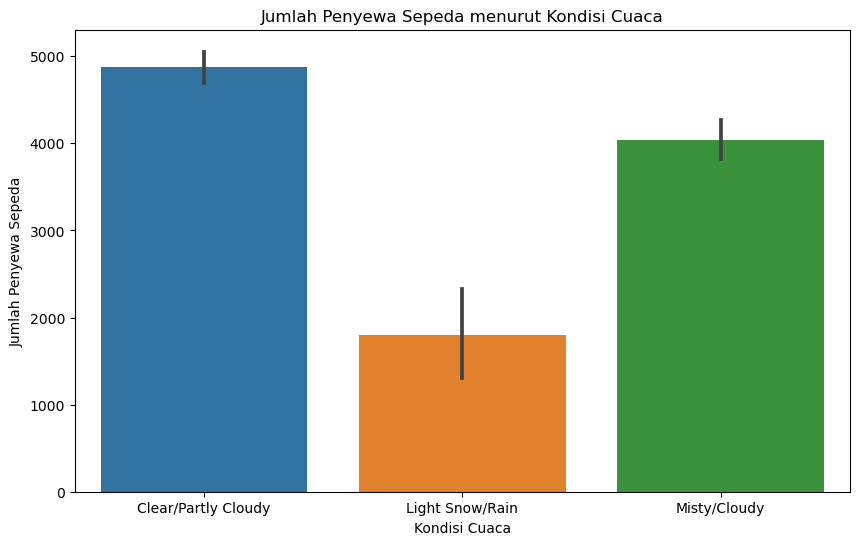

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='count',
    data=day)

plt.title('Jumlah Penyewa Sepeda menurut Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

Melalui analisis visual menggunakan boxplot, dapat disimpulkan bahwa terdapat korelasi yang signifikan antara kondisi cuaca dan jumlah penyewa sepeda. Kondisi cuaca yang cerah atau setengah mendung menunjukkan tingkat minat yang tinggi, diikuti oleh kondisi cuaca berkabut atau mendung, sementara kondisi cuaca dengan sedikit salju atau hujan memiliki tingkat minat yang paling rendah.

## 2. Bagaimana tren penggunaan sepeda dalam setahun?

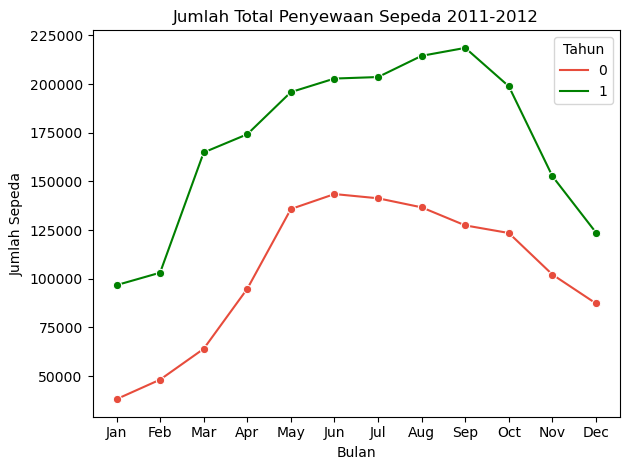

In [31]:
day['month'] = pd.Categorical(day['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

custom_palette = ["#e74c3c","#008000"]
sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette=custom_palette,
    marker="o")

plt.title("Jumlah Total Penyewaan Sepeda 2011-2012")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sepeda")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Berdasarkan line plot di atas, dapat disimpulkan bahwa pada tahun 2012 (kode: 1), penyewaan sepeda secara konsisten mengungguli sepanjang tahun dari Januari hingga Desember. Puncak aktivitas penyewaan terjadi pada bulan September, sementara Januari menjadi bulan dengan tingkat penyewaan terendah. Sebaliknya, pada tahun 2011 (kode: 0), bulan Juni mencatat puncak penyewaan sepeda, sedangkan Januari menjadi bulan dengan tingkat penyewaan terendah.

## 3. Apakah musim berpengaruh terhadap jumlah penyewa sepeda berdasarkan pelanggan Casual dan Registered?

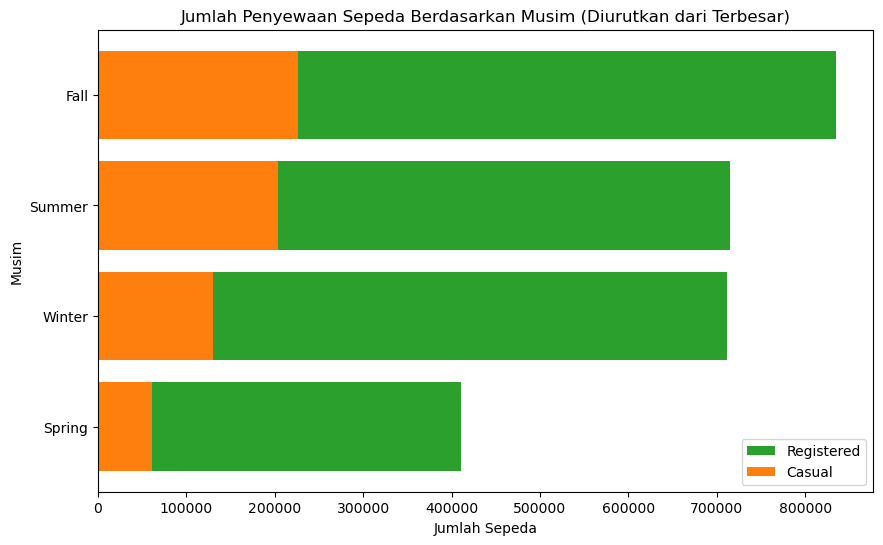

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = day.groupby('season')[['registered', 'casual']].sum().reset_index()

# Mengurutkan DataFrame berdasarkan jumlah pendaftaran terdaftar (registered) secara descending
seasonal_usage = seasonal_usage.sort_values(by='registered', ascending=True)

plt.figure(figsize=(10, 6))

# Membuat horizontal bar plot
plt.barh(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:green'
)

plt.barh(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel("Jumlah Sepeda")
plt.ylabel("Musim")
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim (Diurutkan dari Terbesar)')
plt.legend()
plt.show()


Berdasarkan analisis barplot di atas, dapat ditarik kesimpulan bahwa musim yang paling diminati oleh pengguna sepeda, baik yang terdaftar maupun casual, adalah musim gugur (Fall). Selanjutnya, urutan preferensi musim berlanjut dengan musim panas (Summer), musim dingin (Winter), dan terakhir musim semi (Spring).

## 4. Bagaimana gambaran situasi ketika sepeda digunakan pada hari kerja, hari libur, dan hari biasa?

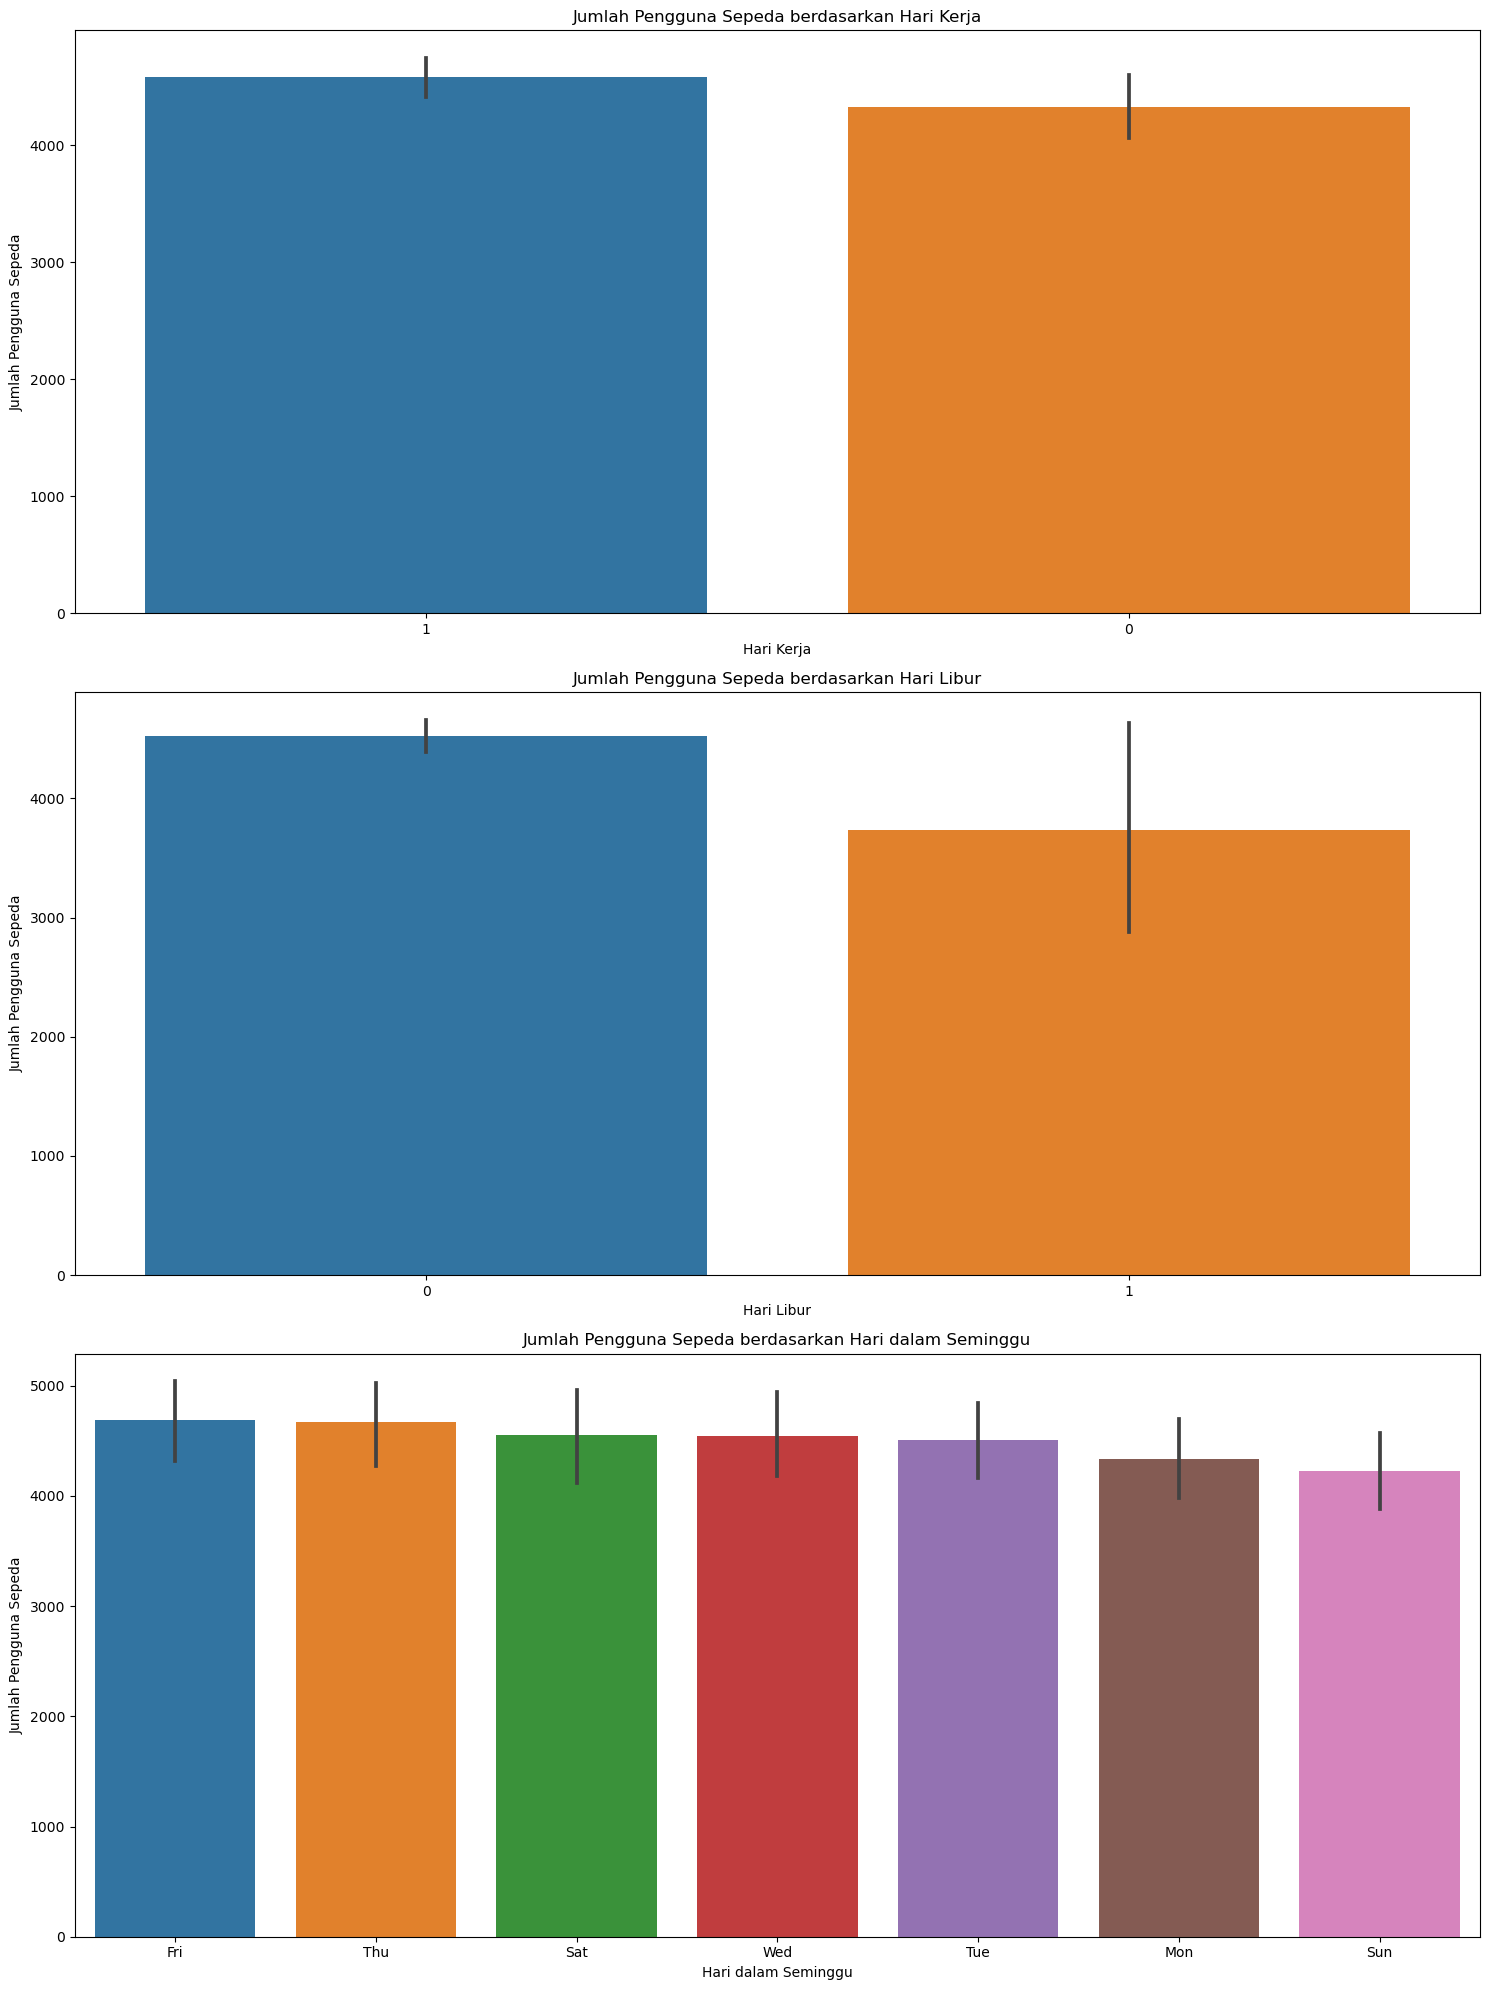

In [73]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,20))

# Berdasarkan workingday
workingday_order = day.groupby('workingday')['count'].mean().sort_values(ascending=False).index
sns.barplot(
    x='workingday',
    y='count',
    data=day,
    order=workingday_order,  # Menyertakan urutan
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan holiday
holiday_order = day.groupby('holiday')['count'].mean().sort_values(ascending=False).index
sns.barplot(
    x='holiday',
    y='count',
    data=day,
    order=holiday_order,  # Menyertakan urutan
    ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan weekday
weekday_order = day.groupby('weekday')['count'].mean().sort_values(ascending=False).index
sns.barplot(
    x='weekday',
    y='count',
    data=day,
    order=weekday_order,  # Menyertakan urutan
    ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

Berdasarkan barplot di atas, terlihat bahwa lebih banyak penyewa sepeda pada hari kerja (Senin hingga Jumat) dibandingkan akhir pekan (Sabtu dan Minggu), di mana 0 mewakili akhir pekan dan 1 mewakili hari kerja. Jumlah penyewa sepeda lebih tinggi pada hari biasa dibandingkan dengan hari libur nasional. Hari Jumat menonjol sebagai hari dengan jumlah penyewa sepeda tertinggi, sementara hari Minggu mencatat jumlah penyewa sepeda yang paling sedikit.

# Kesimpulan Pertanyaan Bisnis

### Pertanyaan 1: 
Terdapat korelasi yang signifikan antara preferensi penyewa sepeda dengan kondisi cuaca tertentu. Cuaca yang cerah atau sedikit mendung menjadi favorit, dengan nilai kuartil ketiga (Q3) melebihi 6000, kuartil pertama (Q1) di bawah 4000, dan median mendekati 5000. Posisi kedua ditempati oleh kondisi berkabut atau mendung, dengan Q3 di atas 5000, Q1 di bawah 3000, dan median melebihi 4000. Sebaliknya, kondisi sedikit bersalju atau hujan kurang diminati, dengan Q3 di atas 2000, Q1 di bawah 1000, dan median melebihi 1000. Informasi tentang kondisi badai besar tidak tersedia, mengingat tidak memungkinkan untuk bersepeda dalam kondisi cuaca ekstrem tersebut.

### Pertanyaan 2: 
Pada visualisasi ini, terlihat perbedaan mencolok antara tahun 2011 dan 2012 dalam hal puncak dan dasar aktivitas penyewaan sepeda. Puncak terjadi pada bulan Juni untuk tahun 2011 dan September untuk tahun 2012, sementara dasarnya tetap pada bulan Januari untuk kedua tahun tersebut. Analisis visual menunjukkan bahwa total penyewaan sepeda pada tahun 2012 secara keseluruhan melebihi jumlah pada tahun 2011.

### Pertanyaan 3: 
Dalam analisis visual ini, hasil yang ditemukan menunjukkan temuan yang mengejutkan, di mana musim semi (Spring) tidak menempati peringkat terakhir seperti yang diperkirakan, melainkan peringkat terakhir dihuni oleh musim semi (Spring). Faktor-faktor seperti kondisi cuaca, suhu udara, hari kerja, hari libur, dan elemen-elemen lainnya kemungkinan berkontribusi terhadap hasil ini. Sebaliknya, musim gugur (Fall) menduduki peringkat pertama dengan jumlah penyewaan sepeda lebih dari 800,000, menunjukkan dominasi yang signifikan.

### Pertanyaan 4: 
Analisis ini memperlihatkan kondisi dalam tiga aspek utama. Pertama, jumlah pengguna sepeda berdasarkan hari kerja menunjukkan dominasi hari kerja dibandingkan dengan akhir pekan, meskipun perbedaannya tidak terlalu signifikan, keduanya tetap berada di atas 4000 jumlah pengguna. Kedua, ketika dilihat berdasarkan hari libur, hari biasa menunjukkan jumlah pengguna yang signifikan lebih tinggi daripada hari libur, menunjukkan preferensi pengguna untuk menyewa sepeda pada hari biasa. Terakhir, berdasarkan weekday, Jumat (Fri) menduduki peringkat pertama dengan mean 4690.288462, sementara Minggu (Sun) menempati urutan terakhir dengan rata-rata 4228.828571.